# Analysis of the basic relaxed energies.

In [2]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Eigenval, Outcar, Oszicar
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Get the basic objects
OutFull = Outcar("OUTCAR")
print("Final energy:", OutFull.final_energy)
print("Fermi energy:", OutFull.efermi)
print("Stopped by user:", OutFull.is_stopped)

Final energy: -18.46430051
Fermi energy: -3.1083
Stopped by user: False


In [4]:
# Other stuff
OutBasics = Oszicar("OSZICAR")
Eigen = Eigenval("EIGENVAL")
print("Complete energy array:\n", OutBasics.all_energies)

Complete energy array:
 ((56.4351203241, -14.878962307, -19.6399633271, -19.6778860452, -19.6781692229, -18.7254043862, -18.3596385487, -18.3503350054, -18.3490981512, -18.3446093816, -18.3431908874, -18.3427403077, -18.3439264235, -18.3437648936, -18.3439658705, -18.3441613038, -18.3442800801, -18.344395477, -18.3444023434, -18.3444109863, -18.3444112611, -18.3444115952, -18.3444116077, -18.3444116212, -18.3444116223, -18.344412), (-16.6795119184, -16.7501975901, -16.6540231729, -16.6524286241, -16.6522033894, -16.6522133133, -16.6522186445, -16.6522214654, -16.6522254228, -16.6522273937, -16.6522255868, -16.6522289182, -16.6522355254, -16.6522386377, -16.6522393347, -16.6522399467, -16.6522399977, -16.6522400125, -16.652240023, -16.6522400246, -16.65224), (-18.5773183831, -18.5247215575, -18.4657737684, -18.4637980971, -18.4638117571, -18.4638135016, -18.4638147958, -18.4638185521, -18.4638212434, -18.4638191637, -18.4638166605, -18.4638155065, -18.4638157724, -18.4638172939, -18.463

In [5]:
energyMatrix = OutBasics.all_energies
indexer = []
for i in range(0, len(energyMatrix)):
    indexer.append(list(range(0, len(energyMatrix[i]))))
    indexer[i] = tuple(indexer[i])
indexer = tuple(indexer)
# Convert everything to tuples so we can zip them into pairs with energyMatrix elements in a moment
print(indexer)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5, 6), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5), (0, 1, 2, 3, 4, 5))


(-20.0, -10.0)

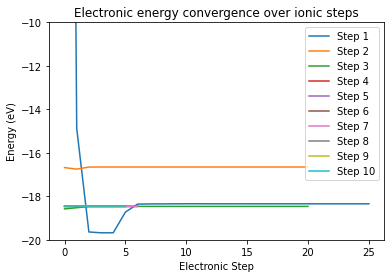

In [6]:
# Plotting
plt.xlabel("Electronic Step")
plt.ylabel("Energy (eV)")
plt.title("Electronic energy convergence over ionic steps")
for i in range(0, len(energyMatrix)):
    plt.plot(indexer[i], energyMatrix[i], label='Step {}'.format(i+1))
plt.legend()
plt.ylim(-20,-10)

# Study DOS

In [7]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
dos = run.tdos

ParseError: not well-formed (invalid token): line 1134, column 4 (<string>)